In [190]:
import numpy as np
from collections import defaultdict
import time
import matplotlib.pyplot as plt

In [191]:
ACTIONS = {
    0: [1, 0],   # north
    1: [-1, 0],  # south
    2: [0, -1],  # west
    3: [0, 1],   # east
}

In [192]:
class CliffWalking:


    def __init__(self):

        self.rows = 4
        self.columns = 12

        self.Move_Reward = -1
        self.Cliff_Reward = -100
        self.Q =defaultdict(lambda: np.zeros(len(ACTIONS)))
        self.nA = 4  #len(ACTIONS)
        self.eps = 1
        self.discount = 1
        self.Final_Reward = 0
        self.state_values = np.zeros((self.rows,self.columns))
        self.real_policy = defaultdict(lambda: 1)
        self.count = 0
        self.count_Q = 0
        self.reward_Q = 0
        self.reward_sarsa = 0


    def reset(self):

        state = (self.rows-1,0)
        return state


    def step(self,state,action):
        done = False
        if state == (self.rows-1,self.columns-1):
            # print('Hello There')
            reward = self.Final_Reward
            done = True
            return state,reward,done

        
        next_state = (state[0]+action[0],state[1]+action[1])
        
        reward = self.Move_Reward

        if next_state[0] == (self.rows-1) and next_state[1]>0 and next_state[1]!=(self.columns-1):
            reward = self.Cliff_Reward
            next_state =  self.reset()
            return next_state,reward,done

        #Out of Bounds North South
        if next_state[0]<0 or next_state[0]>(self.rows-1):
            next_state = state

        #Out of Bounds East West
        if next_state[1]<0 or next_state[1]>=(self.columns):
            next_state = state

        return next_state,reward,done

    def get_action_prob(self,Q_S):

        action_probs = np.ones(self.nA)*(self.eps/self.nA)
        best_action = np.argmax(Q_S)
        action_probs[best_action] = (1-self.eps) + (self.eps/self.nA)

        return action_probs

    def get_action(self,state):

        action_probs = self.get_action_prob(self.Q[state])
        action = np.random.choice(np.arange(self.nA),p=action_probs) if state in self.Q else np.random.randint(0,4) 

        return action

    def best_policy(self):

        return dict((state,np.argmax(actions)) for state,actions in self.Q.items())

    def best_value(self):
        return dict((state,np.max(actions)) for state,actions in self.Q.items())

    def Q_learning(self,alpha):
        
        
        state = env.reset()


        while True:

            self.count_Q +=1 

            _action_ = self.get_action(state)
            action = ACTIONS.get(_action_)

            next_state,reward,done = self.step(state,action)

            
            self.Q[state][_action_] +=  alpha*(reward + self.discount*np.max(self.Q[next_state]) - self.Q[state][_action_])

            state = next_state


            self.reward_Q += reward

            if done:
                break

        return self.Q



    def Q_learning_Episodes(self,iters,alpha):

        EPISDOES_Q = []
        TIME_STEP_Q = []
        Rewards_Q = []
        self.eps = 1

        for i in range(iters):
            
            if i % 5 == 0:
                print("In Loop {:.5f}".format(i), end="\r")

            self.Q = self.Q_learning(alpha)
            self.eps = 1/(i+1)
            TIME_STEP_Q.append(self.count_Q)
            EPISDOES_Q.append(i)
            Rewards_Q.append(self.reward_Q)
            self.reward_Q = 0


        policy = self.best_policy()
        value = self.best_value()
        state_values = self.Real_Value(value)
        real_policy = self.Real_Actions(policy)

        return self.Q,real_policy,state_values,TIME_STEP_Q,EPISDOES_Q,Rewards_Q

    



    def Real_Actions(self,policy):
        states_ava = []
        for i in policy:
            states_ava.append(i)
            
        actions_ava = []
        for state in states_ava:
            action = policy.get(state)
            real_a = ACTIONS[action]
            self.real_policy[state] = real_a 
            
        return self.real_policy


    def Real_Value(self,value):

        for x in value.items():
            self.state_values[x[0]] = x[1]

        return self.state_values



    #--------------------------------------------------------SARSA CODE----------------------------------------------------





    def TD_Sarsa(self,iters,alpha):

        EPISODE = []
        TIME_STEP = []
        REWARD_SARSA = []
        self.Q =defaultdict(lambda: np.zeros(len(ACTIONS)))
        self.eps = 1

        for episdoes in range(iters):
            if episdoes % 5 == 0:
                print("In Loop {:.5f}".format(episdoes), end="\r")
            self.Q = self.Update_Q(alpha)
            
            #Changing the decaying eps to fixed uncommet for chaning to 1/k
            self.eps = (1/(episdoes+1))
            # self.eps = 0.1
            
            TIME_STEP.append(self.count)
            EPISODE.append(episdoes)
            REWARD_SARSA.append(self.reward_sarsa)
            self.reward_sarsa = 0

        policy = self.best_policy()

        real_policy = self.Real_Actions(policy)
        value = self.best_value()
        state_values = self.Real_Value(value)
        # plt.plot(TIME_STEP, EPISODE)
        # plt.title('Time_STEP vs EPISODE')
        # plt.xlabel('Time_STEP')
        # plt.ylabel('EPISODE')
        # plt.show()

        return self.Q,real_policy,self.state_values,TIME_STEP,EPISODE,REWARD_SARSA



    def Update_Q(self,alpha):


        state = self.reset()

        #Numerical Action
        _action_ = self.get_action(state)
        
        #Selecting real action from Dictionary
        action = ACTIONS.get(_action_)

        

        while True:
            
            self.count +=1
            next_state,reward,done = self.step(state,action)
            
            #Numerical Action
            _next_action_ = self.get_action(next_state)

            #Real Action
            next_action = ACTIONS.get(_next_action_)


            if done:
                #Setting Q for next state as 0 
                self.Q[next_state][_next_action_] = 0
                
            self.Q[state][_action_] +=  alpha*(reward + self.discount*self.Q[next_state][_next_action_] - self.Q[state][_action_])
          

            #Setting the next state and actions to current
            state = next_state
            _action_ = _next_action_
            action = next_action

            self.reward_sarsa += reward

            if done:
                break
            
        return self.Q


     #--------------------------------------------------------RUN BOTHCODE----------------------------------------------------
        


    def run_Q_and_Sarsa(self,iters,alpha):
        
        #SARSA
        Q_sarsa,policy_sarsa,value_sarsa,time_step_sarsa,eps_sarsa,reward_sarsa = self.TD_Sarsa(iters,alpha)

        #QLearning
        Q_Q,policy_Q,value_Q,time_step_Q,eps_Q,reward_Q = self.Q_learning_Episodes(iters,alpha)


        #Episodes VS Rewards Sarsa vs Rewards Q-Learning

        print('Ploting Episdoes VS Rewards....')
        # time.sleep(2)

        plt.plot(eps_Q,reward_Q)
        plt.plot(eps_sarsa,reward_sarsa)
        plt.ylim(-200, 0)
        plt.title('Rewards vs Episodes')
        plt.xlabel('Episdoes')
        plt.ylabel('Rewards')
        plt.show()

        print('Ploting Time Steps VS Episodes....')
        # time.sleep(2)

        #Episodes VS TimeSteps Sarsa vs Q-Learning
        plt.plot(time_step_Q, eps_Q)
        plt.plot(time_step_sarsa,eps_sarsa)
        plt.title('Time Step vs Episodes')
        plt.xlabel('Time Step')
        plt.ylabel('Episdoes')
        plt.show()

        
        return Q_sarsa,policy_sarsa,value_sarsa,Q_Q,policy_Q,value_Q

    # def random_episode(self):

    #     trajectory = []

    #     state = env.reset()

    #     count = 0

    #     while True:

    #         _action_ = self.get_action(state)
    #         action = ACTIONS.get(_action_)

    #         next_state,reward,done = self.step(state,action)
    #         # print(next_state)

    #         trajectory.append((state,action,reward))
    #         # print(reward)

    #         state = next_state

    #         if count % 5:
    #             print("In Loop {:.5f}".format(count), end="\r")
    #         count +=1
            
    #         if done:
    #             break

    #     return trajectory



In [197]:
env = CliffWalking()

Ploting Episdoes VS Rewards....


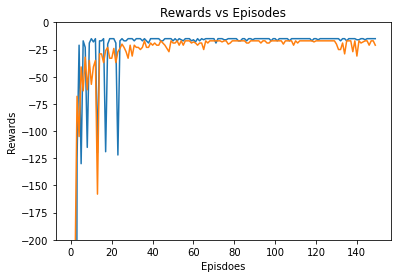

Ploting Time Steps VS Episodes....


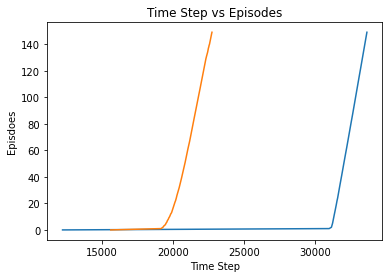

In [199]:
alpha = 0.2
iters = int(input('Enter Number Of Iterations: '))

Q_sarsa,policy_sarsa,value_sarsa,Q_Q,policy_Q,value_Q = env.run_Q_and_Sarsa(iters,alpha)